# Exploratory Data Analysis Notebook

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from collections import Counter
import string

In [27]:
df1 = pd.read_csv('../data/taylor_swift_lyrics.csv', encoding = "latin1")
df1

,artist,album,track_title,track_n,lyric,line,year
0,Taylor Swift,Taylor Swift,Tim McGraw,1,He said the way my blue eyes shined,1,2006
1,Taylor Swift,Taylor Swift,Tim McGraw,1,Put those Georgia stars to shame that night,2,2006
2,Taylor Swift,Taylor Swift,Tim McGraw,1,"I said, ""That's a lie""",3,2006
3,Taylor Swift,Taylor Swift,Tim McGraw,1,Just a boy in a Chevy truck,4,2006
4,Taylor Swift,Taylor Swift,Tim McGraw,1,That had a tendency of gettin' stuck,5,2006
...,...,...,...,...,...,...,...
4857,Taylor Swift,reputation,New Year's Day,15,"(Hold on to the memories, they will hold on to...",43,2017
4858,Taylor Swift,reputation,New Year's Day,15,Please don't ever become a stranger,44,2017
4859,Taylor Swift,reputation,New Year's Day,15,"(Hold on to the memories, they will hold on to...",45,2017
4860,Taylor Swift,reputation,New Year's Day,15,Whose laugh I could recognize anywhere,46,2017


In [28]:
df2 = pd.read_parquet('../data/taylor_swift_4_albums.parquet')
df2

,artist,album,track_title,track_n,lyric,line,year
0,Taylor Swift,folklore,this is me trying,1,I've been having a hard time adjusting,1,2020
1,Taylor Swift,folklore,this is me trying,1,"I had the shiniest wheels, now they're rusting",2,2020
2,Taylor Swift,folklore,this is me trying,1,I didn't know if you'd care if I came back,3,2020
3,Taylor Swift,folklore,this is me trying,1,I have a lot of regrets about that,4,2020
4,Taylor Swift,folklore,this is me trying,1,Pulled the car off the road to the lookout,5,2020
...,...,...,...,...,...,...,...
3123,Taylor Swift,Lover,Afterglow,18,Sorry that I hurt you,56,2019
3124,Taylor Swift,Lover,Afterglow,18,"I don't wanna do, I don't wanna do this to you...",57,2019
3125,Taylor Swift,Lover,Afterglow,18,"I don't wanna lose, I don't wanna lose this wi...",58,2019
3126,Taylor Swift,Lover,Afterglow,18,"I need to say, hey, it's all me, just don't go",59,2019


In [29]:
df = pd.concat([df1, df2])
df.reset_index(drop=True, inplace=True)
df['year'] = df['year'].astype(int)
df.head()


,artist,album,track_title,track_n,lyric,line,year
0,Taylor Swift,Taylor Swift,Tim McGraw,1,He said the way my blue eyes shined,1,2006
1,Taylor Swift,Taylor Swift,Tim McGraw,1,Put those Georgia stars to shame that night,2,2006
2,Taylor Swift,Taylor Swift,Tim McGraw,1,"I said, ""That's a lie""",3,2006
3,Taylor Swift,Taylor Swift,Tim McGraw,1,Just a boy in a Chevy truck,4,2006
4,Taylor Swift,Taylor Swift,Tim McGraw,1,That had a tendency of gettin' stuck,5,2006


In [30]:
df.describe()

,track_n,line,year
count,7990.000000,7990.00000,7990.000000
mean,8.351189,30.29174,2015.112516
std,4.662613,19.18774,4.941944
min,1.000000,1.00000,2006.000000
25%,4.000000,14.00000,2010.000000
50%,8.000000,28.00000,2017.000000
75%,12.000000,44.00000,2020.000000
max,19.000000,101.00000,2022.000000


We don't have NULLs in the dataset

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7990 entries, 0 to 7989
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   artist       7990 non-null   object
 1   album        7990 non-null   object
 2   track_title  7990 non-null   object
 3   track_n      7990 non-null   int64 
 4   lyric        7990 non-null   object
 5   line         7990 non-null   int64 
 6   year         7990 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 437.1+ KB


Let see how many albums and songs we have

In [32]:
album_info = df.groupby(['album', 'year'])['track_n'].nunique().reset_index()
album_info.rename(columns={'track_n': 'number_of_tracks'}, inplace=True)
sorted_album_info = album_info.sort_values(by='year')
sorted_album_info



,album,year,number_of_tracks
6,Taylor Swift,2006,14
1,Fearless,2008,13
5,Speak Now,2010,17
4,Red,2012,19
0,1989,2014,16
9,reputation,2017,15
2,Lover,2019,18
7,evermore,2020,15
8,folklore,2020,16
3,Midnights,2022,13


You may have noticed that our lyrics contain capital letters, punctuation and contractions. Let's lower the letters, remove punctuation and extract contractions.

In [33]:
contractions = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", 
                       "could've": "could have", "couldn't": "could not", "didn't": "did not",  
                       "doesn't": "does not", "don't": "do not", "hadn't": "had not", "hasn't": "has not", 
                       "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", 
                       "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  
                       "I'd": "I would", "I'd've": "I would have", "I'll": "I will", "I'll've": "I will have",
                       "I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", 
                       "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", 
                       "isn't": "is not", "it'd": "it would", "it'd've": "it would have", "it'll": "it will", 
                       "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", 
                       "mayn't": "may not", "might've": "might have","mightn't": "might not",
                       "mightn't've": "might not have", "must've": "must have", "mustn't": "must not", 
                       "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have",
                       "o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", 
                       "shan't": "shall not", "sha'n't": "shall not", "shan't've": "shall not have", 
                       "she'd": "she would", "she'd've": "she would have", "she'll": "she will", 
                       "she'll've": "she will have", "she's": "she is", "should've": "should have", 
                       "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have",
                       "so's": "so as", "this's": "this is","that'd": "that would", 
                       "that'd've": "that would have", "that's": "that is", "there'd": "there would", 
                       "there'd've": "there would have", "there's": "there is", "here's": "here is",
                       "they'd": "they would", "they'd've": "they would have", "they'll": "they will", 
                       "they'll've": "they will have", "they're": "they are", "they've": "they have", 
                       "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", 
                       "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", 
                       "weren't": "were not", "what'll": "what will", "what'll've": "what will have", 
                       "what're": "what are",  "what's": "what is", "what've": "what have", "when's": "when is",
                       "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", 
                       "who'll": "who will", "who'll've": "who will have", "who's": "who is", "who've": "who have", 
                       "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", 
                       "won't've": "will not have", "would've": "would have", "wouldn't": "would not", 
                       "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would",
                       "y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                       "you'd": "you would", "you'd've": "you would have", "you'll": "you will", 
                       "you'll've": "you will have", "you're": "you are", "you've": "you have" ,
                       "Isn't":"is not", "\u200b":"", "It's": "it is","I'm": "I am","don't":"do not","did't":"did not","ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", 
                       "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", 
                       "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", 
                       "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  "I'd": "I would", "I'd've": "I would have", "I'll": "I will", 
                       "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", "i'll": "i will", 
                       "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", "it'd've": "it would have", 
                       "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam", "mayn't": "may not", 
                       "might've": "might have","mightn't": "might not","mightn't've": "might not have", "must've": "must have", 
                       "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have",
                       "o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", 
                       "sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", 
                       "she'll": "she will", "she'll've": "she will have", "she's": "she is", "should've": "should have", 
                       "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have","so's": "so as",
                       "this's": "this is", "that's": "that is" , "that'd": "that would", "that'd've": "that would have", "that's": "that is", 
                       "there'd": "there would", "there'd've": "there would have", "there's": "there is",
                       "here's": "here is","they'd": "they would", "they'd've": "they would have", "they'll": "they will", "they'll've": "they will have",
                       "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", "we'd": "we would", "we'd've": "we would have", 
                       "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", "weren't": "were not", "what'll": "what will",
                       "what'll've": "what will have", "what're": "what are",  "what's": "what is", "what've": "what have", "when's": "when is", "when've": "when have", 
                       "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", "who'll've": "who will have", "who's": "who is",
                       "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", "won't": "will not", "won't've": "will not have", 
                       "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", "y'all": "you all", "y'all'd": "you all would","y'all'd've": 
                       "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": "you would", "you'd've": "you would have", "you'll": "you will",
                        "you'll've": "you will have", "you're": "you are", "you've": "you have",
                        "'bout": "about", "that'll": "that will", "'em": "them" }

In [34]:
import string

# Create a translation table that maps punctuation to None, except apostrophes
punctuation_except_apostrophe = string.punctuation.replace("'", "")
translation_table = str.maketrans("", "", punctuation_except_apostrophe)

df['lyric_clean'] = df['lyric'].str.lower()

# Apply the translation to each lyric
df['lyric_clean'] = df['lyric_clean'].apply(lambda x: x.translate(translation_table))

for contraction, replacement in contractions.items():
    df['lyric_clean'] = df['lyric_clean'].str.replace(contraction, replacement, regex=False)

df


,artist,album,track_title,track_n,lyric,line,year,lyric_clean
0,Taylor Swift,Taylor Swift,Tim McGraw,1,He said the way my blue eyes shined,1,2006,he said the way my blue eyes shined
1,Taylor Swift,Taylor Swift,Tim McGraw,1,Put those Georgia stars to shame that night,2,2006,put those georgia stars to shame that night
2,Taylor Swift,Taylor Swift,Tim McGraw,1,"I said, ""That's a lie""",3,2006,i said that is a lie
3,Taylor Swift,Taylor Swift,Tim McGraw,1,Just a boy in a Chevy truck,4,2006,just a boy in a chevy truck
4,Taylor Swift,Taylor Swift,Tim McGraw,1,That had a tendency of gettin' stuck,5,2006,that had a tendency of gettin' stuck
...,...,...,...,...,...,...,...,...
7985,Taylor Swift,Lover,Afterglow,18,Sorry that I hurt you,56,2019,sorry that i hurt you
7986,Taylor Swift,Lover,Afterglow,18,"I don't wanna do, I don't wanna do this to you...",57,2019,i do not wanna do i do not wanna do this to yo...
7987,Taylor Swift,Lover,Afterglow,18,"I don't wanna lose, I don't wanna lose this wi...",58,2019,i do not wanna lose i do not wanna lose this w...
7988,Taylor Swift,Lover,Afterglow,18,"I need to say, hey, it's all me, just don't go",59,2019,i need to say hey it is all me just do not go


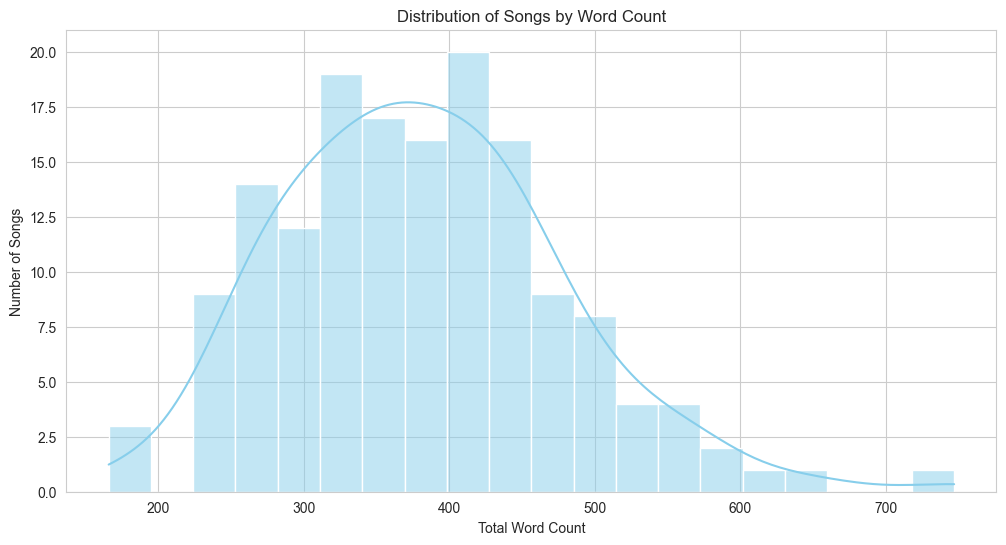

In [35]:
# Calculating word count distribution by song
df['word_count'] = df['lyric_clean'].apply(lambda x: len(x.split()) if x is not None else 0)

# Aggregating word count by song
word_count_distribution = df.groupby(['album', 'track_title'])['word_count'].sum().reset_index()

# Renaming columns for clarity
word_count_distribution.rename(columns={'word_count': 'total_word_count'}, inplace=True)

sns.set_style("whitegrid")
plt.figure(figsize=(12, 6))
sns.histplot(word_count_distribution['total_word_count'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Songs by Word Count')
plt.xlabel('Total Word Count')
plt.ylabel('Number of Songs')
plt.show()




I would also like to see how many duplicate rows we have and remove them. There is a tendency in songs to repeat phrases and I would not like to reinforce these words with repetitions for my future models

In [36]:
repetitive_rows = df['lyric_clean'].value_counts()
repetitive_rows = repetitive_rows[repetitive_rows > 1]

repetitive_rows

lyric_clean
you might also like                   62
welcome to new york                   27
all you had to do was stay            15
oh oh                                 13
look what you just made me do         13
                                      ..
and the sparks fly                     2
but you might have to wait in line     2
got that ah i mean i mean              2
and you just see right through me      2
just like all those times before       2
Name: count, Length: 1298, dtype: int64

I'm going to drop all duplicates

In [37]:
df_deduplicated = df.drop_duplicates(subset='lyric')
df_deduplicated.shape

(5325, 9)

Let's look at Word Cloud

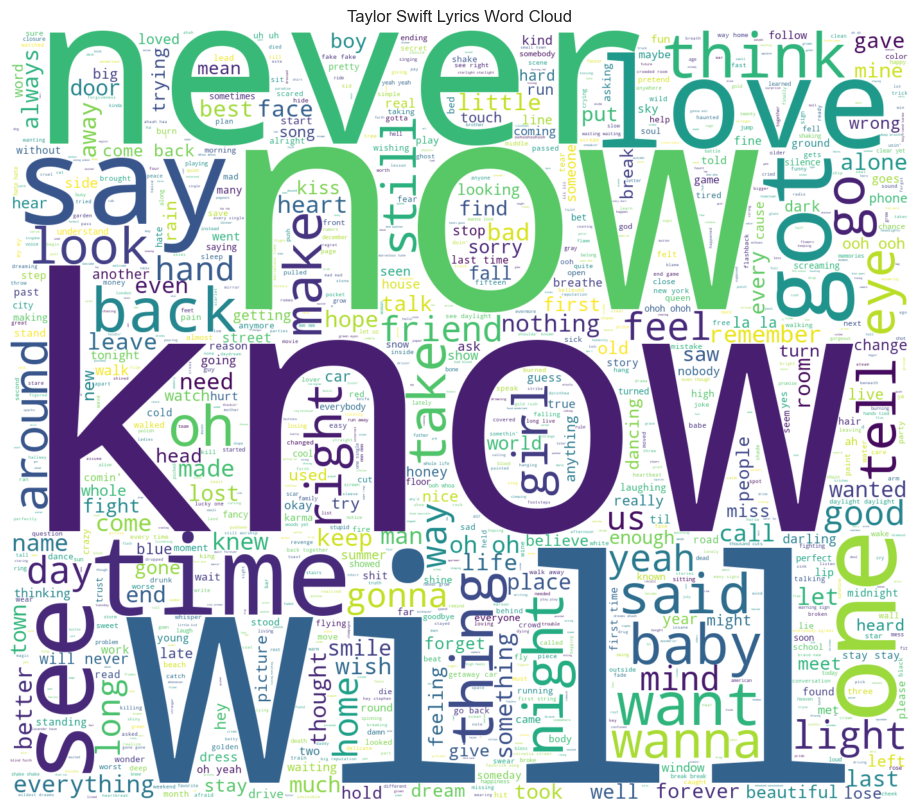

In [38]:
lyrics_text = " ".join(lyric for lyric in df_deduplicated['lyric_clean'] if not pd.isnull(lyric))

wordcloud = WordCloud(
    stopwords=STOPWORDS,
    background_color='white',
    max_words=10000,
    width=1400,
    height=1200
).generate(lyrics_text)

plt.subplots(figsize=(16,10))
plt.imshow(wordcloud, interpolation='bilinear')
plt.title('Taylor Swift Lyrics Word Cloud')
plt.axis('off')
plt.show()


You can see that the most frequent words are know, will and oh.

In [40]:
lyrics_text = ' '.join(df_deduplicated['lyric_clean'].dropna())

# Split the text into words
words = lyrics_text.split()

# Filter out the stopwords
filtered_words = [word for word in words if word.lower() not in STOPWORDS]

# Counting the frequency of the remaining words
word_frequencies = Counter(filtered_words)

# Get the most common words
most_common_words = word_frequencies.most_common(10)
most_common_words

[('know', 274),
 ('will', 242),
 ('never', 203),
 ('now', 203),
 ('oh', 190),
 ('time', 166),
 ('back', 153),
 ('love', 145),
 ('see', 142),
 ('one', 141)]

Let's check if we have characters that should not be in the text - non-ASCII characters

In [41]:
unique_chars = set()
df_deduplicated['lyric_clean'].dropna().apply(lambda x: unique_chars.update(set(x)))

sorted_unique_chars = sorted(list(unique_chars))

# Filtering out non-ASCII characters from the sorted list of unique characters
non_ascii_chars = [char for char in sorted_unique_chars if ord(char) > 127]

print("non-ASCII characters", non_ascii_chars)

remove_chars = ''.join(non_ascii_chars)

def remove_non_ascii(text, remove_chars):
    return ''.join(char for char in text if char not in remove_chars)

df_deduplicated.loc[df_deduplicated['lyric_clean'].notna(), 'lyric_clean'] = df_deduplicated.loc[df['lyric_clean'].notna(), 'lyric_clean'].apply(lambda x: remove_non_ascii(x, remove_chars))


non-ASCII characters ['\x85', '\x91', '\x93', '\x94', '\x96', '\x97', 'é', 'í', 'ó', 'е', '\u2005', '—', '’', '\u205f']


In [42]:
df_deduplicated = df_deduplicated.drop(columns=["word_count"])

Let's see if we have some weird words in the lyrics

In [43]:
from spellchecker import SpellChecker

# Instantiate the spell checker
spell = SpellChecker()

all_words = ' '.join(df_deduplicated['lyric_clean'].dropna()).split()

# Find misspelled words
misspelled_words = spell.unknown(all_words)

misspelled_words_list = list(misspelled_words)

corrected_words = {word: spell.correction(word) for word in misspelled_words_list}
no_correction = {word: correction for word, correction in corrected_words.items() if correction is None}

no_correction


{'halfmoon': None,
 'friendsyou': None,
 'dreamscapes': None,
 'twentyyear': None,
 'mirrorball': None,
 'whitecollar': None,
 'afternoons': None,
 'notfunnyat': None,
 'openshut': None,
 'whoaahoh': None,
 'ladadada': None,
 'youpainted': None,
 'selfexpression': None,
 'getyouout': None,
 'coasttookher': None,
 'howdidamiddleclass': None,
 'intheshade': None,
 'thebeachesnow': None,
 'sainttropez': None,
 'hideandseek': None,
 'mywinlessfight': None,
 'woahahah': None,
 'ohsoeasy': None,
 'eightyseven': None,
 'oohwoooohoohooh': None,
 'tonguetied': None,
 'bloodsoaked': None,
 'giftwrapped': None,
 'youusedtowork': None,
 'ilovedyoui': None,
 'oohoohoohoohooh': None,
 'oooowhoa': None,
 'backandforth': None,
 "'90s": None,
 'snowglobe': None,
 'shoreditch': None,
 'selfindulgent': None,
 'ahaahaahaahaahhaa': None,
 'eightynine': None,
 'wouldmeet': None,
 'lightbody': None,
 'nevergiveyoupeace': None,
 '1950s': None,
 'bettyone': None,
 'everpresent': None,
 'gladhanding': None,
 'p

Let's drop those words, most of them looks like grammatical garbage

In [44]:
def remove_uncorrectable_words(text):
    words = text.split()
    return ' '.join(word for word in words if word not in no_correction)

df_deduplicated['lyric_clean'] = df_deduplicated['lyric_clean'].apply(lambda x: remove_uncorrectable_words(x))
df_deduplicated = df_deduplicated[df_deduplicated['lyric_clean'].str.strip().astype(bool)]
df_deduplicated


,artist,album,track_title,track_n,lyric,line,year,lyric_clean
0,Taylor Swift,Taylor Swift,Tim McGraw,1,He said the way my blue eyes shined,1,2006,he said the way my blue eyes shined
1,Taylor Swift,Taylor Swift,Tim McGraw,1,Put those Georgia stars to shame that night,2,2006,put those georgia stars to shame that night
2,Taylor Swift,Taylor Swift,Tim McGraw,1,"I said, ""That's a lie""",3,2006,i said that is a lie
3,Taylor Swift,Taylor Swift,Tim McGraw,1,Just a boy in a Chevy truck,4,2006,just a boy in a chevy truck
4,Taylor Swift,Taylor Swift,Tim McGraw,1,That had a tendency of gettin' stuck,5,2006,that had a tendency of gettin' stuck
...,...,...,...,...,...,...,...,...
7976,Taylor Swift,Lover,Afterglow,18,Even when I lose my mind,46,2019,even when i lose my mind
7977,Taylor Swift,Lover,Afterglow,18,I need to say,47,2019,i need to say
7978,Taylor Swift,Lover,Afterglow,18,Tell me that it's not my fault,48,2019,tell me that it is not my fault
7979,Taylor Swift,Lover,Afterglow,18,Tell me that I'm all you want,49,2019,tell me that i am all you want


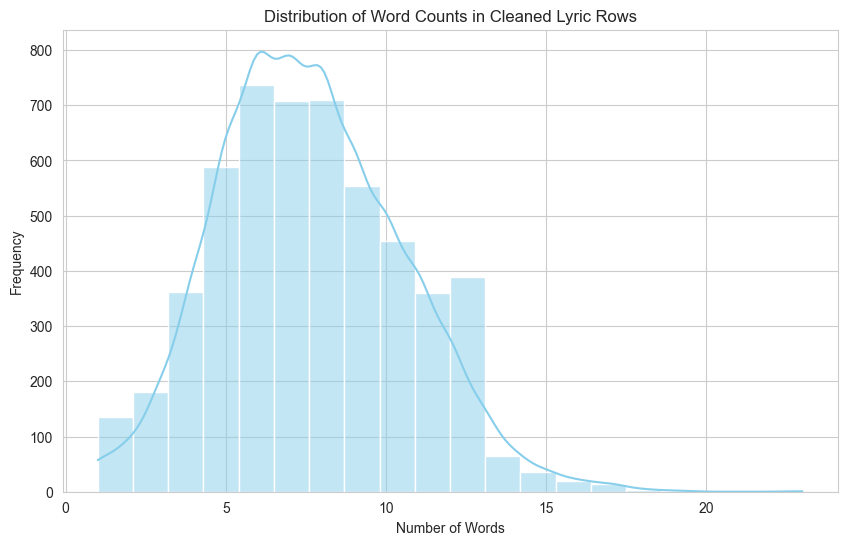

In [45]:
df_deduplicated['word_count'] = df_deduplicated['lyric_clean'].apply(lambda x: len(x.split()))

sns.set_style("whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(df_deduplicated['word_count'], bins=20, kde=True, color='skyblue')
plt.title('Distribution of Word Counts in Cleaned Lyric Rows')
plt.xlabel('Number of Words')
plt.ylabel('Frequency')
plt.show()


Let's identify the number of unique words used per song and per album.

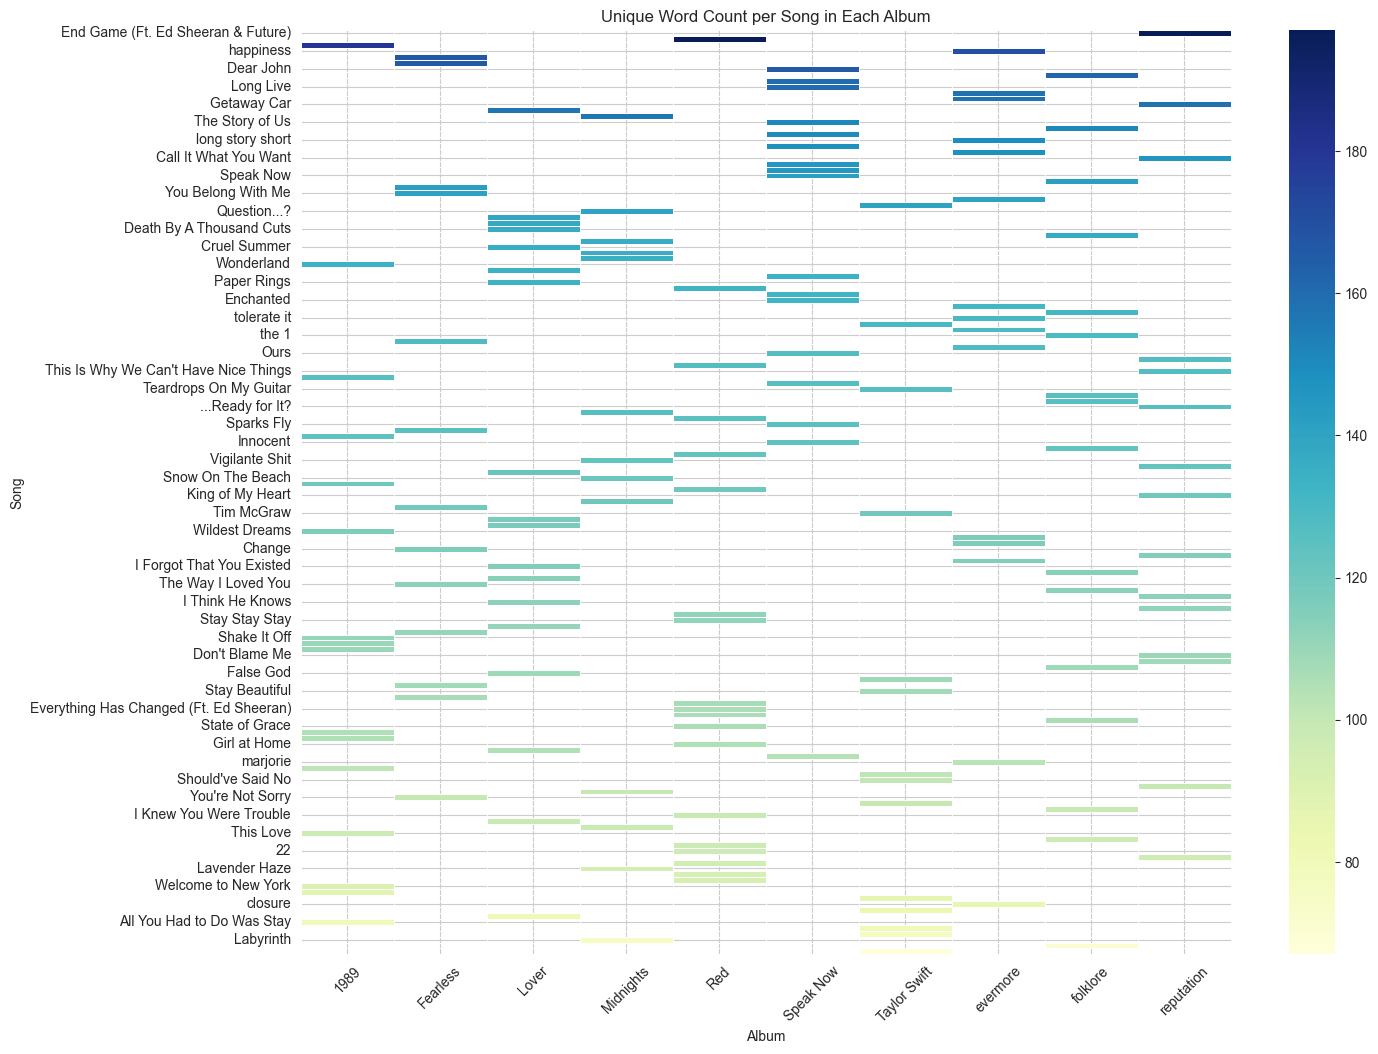

In [46]:
unique_word_count = df_deduplicated.groupby(['album', 'track_title'])['lyric_clean'].apply(lambda x: len(set(' '.join(x).split()))).reset_index(name='unique_word_count')

# Pivot the data for better visualization
pivot_data = unique_word_count.pivot(index="track_title", columns="album", values="unique_word_count")

unique_word_count = df.groupby(['album', 'track_title'])['lyric_clean'].apply(lambda x: len(set(' '.join(x).split()))).reset_index(name='unique_word_count')

pivot_data['total_unique_words'] = pivot_data.sum(axis=1)
pivot_data = pivot_data.sort_values('total_unique_words', ascending=False).drop('total_unique_words', axis=1)

plt.figure(figsize=(15, 12))
sns.heatmap(pivot_data,  cmap="YlGnBu", linewidths=.5)
plt.title('Unique Word Count per Song in Each Album')
plt.xlabel('Album')
plt.ylabel('Song')
plt.xticks(rotation=45)
plt.yticks(rotation=0)
plt.show()

Let's analyze the length of songs in terms of word count and character count. How does song length vary across albums?

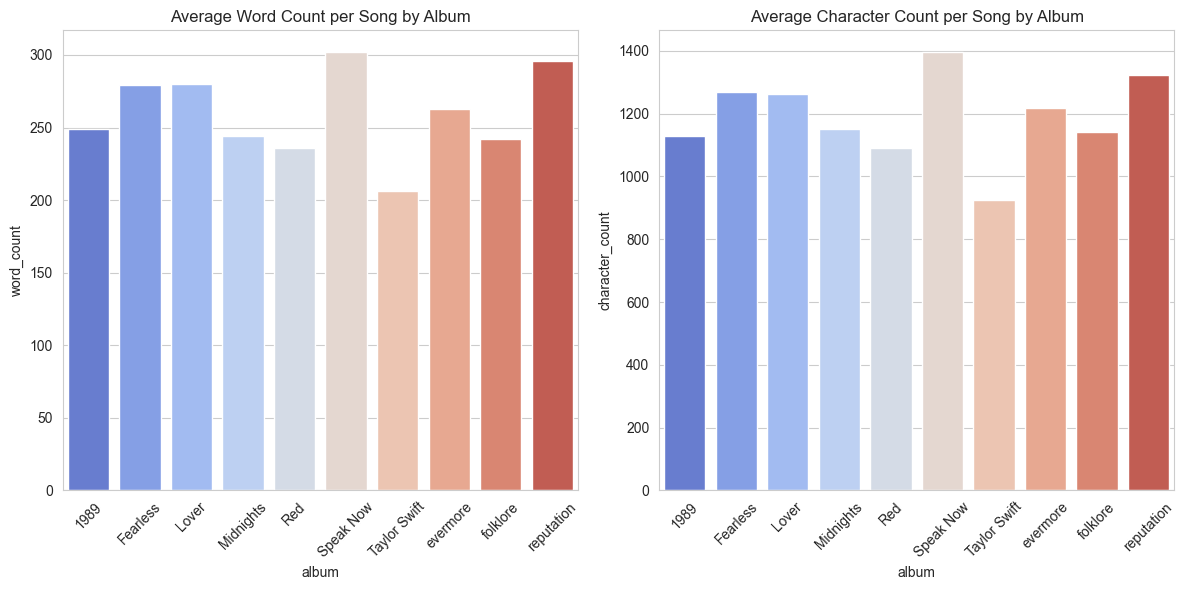

In [49]:
# Calculate word count and character count for each song
df_deduplicated['word_count'] = df_deduplicated['lyric_clean'].apply(lambda x: len(x.split()))
df_deduplicated['character_count'] = df_deduplicated['lyric_clean'].apply(len)

# Group by album and calculate average word count and character count
album_lengths = df_deduplicated.groupby(['album', 'track_title']).agg({'word_count': 'sum', 'character_count': 'sum'}).groupby('album').mean().reset_index()

plt.figure(figsize=(12, 6))

# Word count plot
plt.subplot(1, 2, 1)
plt.xticks(rotation=45)
sns.barplot(x='album', y='word_count', data=album_lengths, palette='coolwarm', hue='album', legend=False)
plt.title('Average Word Count per Song by Album')

# Character count plot
plt.subplot(1, 2, 2)
sns.barplot(x='album', y='character_count', data=album_lengths, palette='coolwarm', hue='album', legend=False)
plt.title('Average Character Count per Song by Album')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



Let's do N-gram Analysis: Look at common bigrams (pairs of words) or trigrams (triplets of words) in the lyrics.

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/olgabraginskaya/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


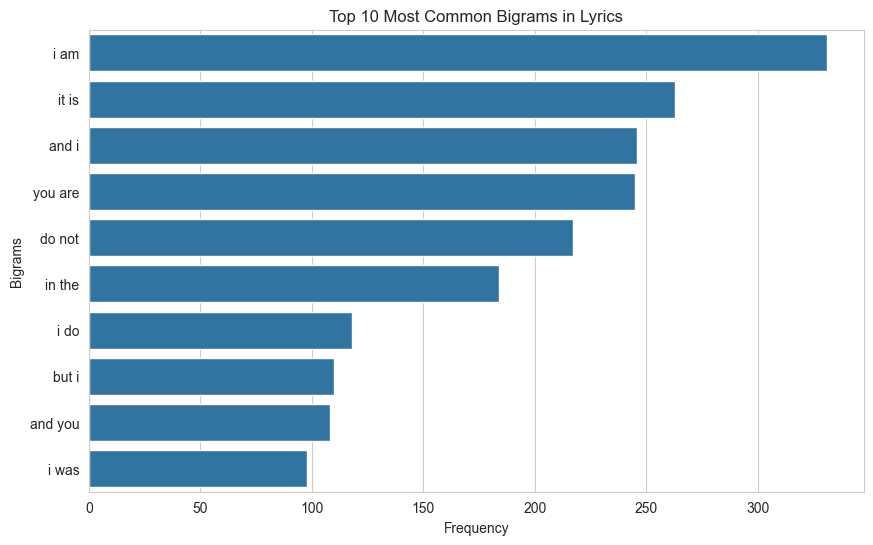

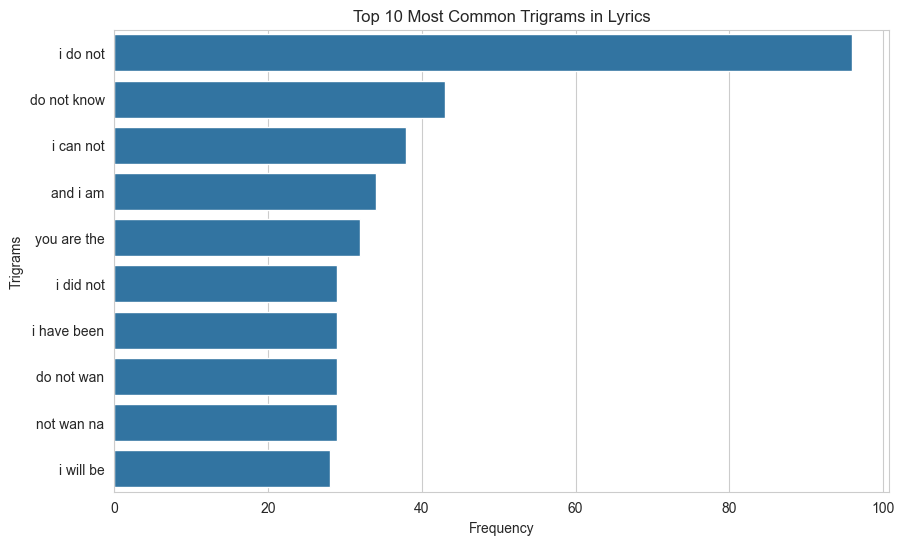

In [50]:
import nltk
from nltk import ngrams
from collections import Counter

# Ensure you have the necessary NLTK resources
nltk.download('punkt')

# Combine all lyrics into one text
all_lyrics = ' '.join(df_deduplicated['lyric_clean'])

# Tokenize the text
words = nltk.word_tokenize(all_lyrics)

# Generate bigrams and trigrams
bigrams = ngrams(words, 2)
trigrams = ngrams(words, 3)

# Count and display the most common bigrams and trigrams
bigram_counts = Counter(bigrams)
trigram_counts = Counter(trigrams)

most_common_bigrams = bigram_counts.most_common(10)
bigram_labels = [' '.join(bigram) for bigram, count in most_common_bigrams]
bigram_values = [count for bigram, count in most_common_bigrams]

most_common_trigrams = trigram_counts.most_common(10)
trigram_labels = [' '.join(trigram) for trigram, count in most_common_trigrams]
trigram_values = [count for trigram, count in most_common_trigrams]

# Plotting the most common bigrams
plt.figure(figsize=(10, 6))
sns.barplot(x=bigram_values, y=bigram_labels)
plt.title('Top 10 Most Common Bigrams in Lyrics')
plt.xlabel('Frequency')
plt.ylabel('Bigrams')
plt.show()


# Plotting the most common bigrams
plt.figure(figsize=(10, 6))
sns.barplot(x=trigram_values, y=trigram_labels)
plt.title('Top 10 Most Common Trigrams in Lyrics')
plt.xlabel('Frequency')
plt.ylabel('Trigrams')
plt.show()

Let's look at lexical diversity in the albums

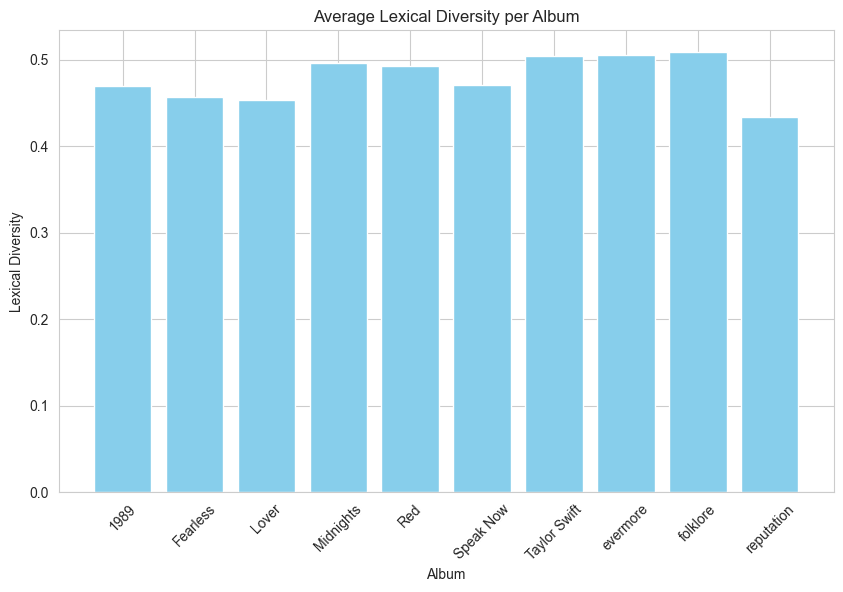

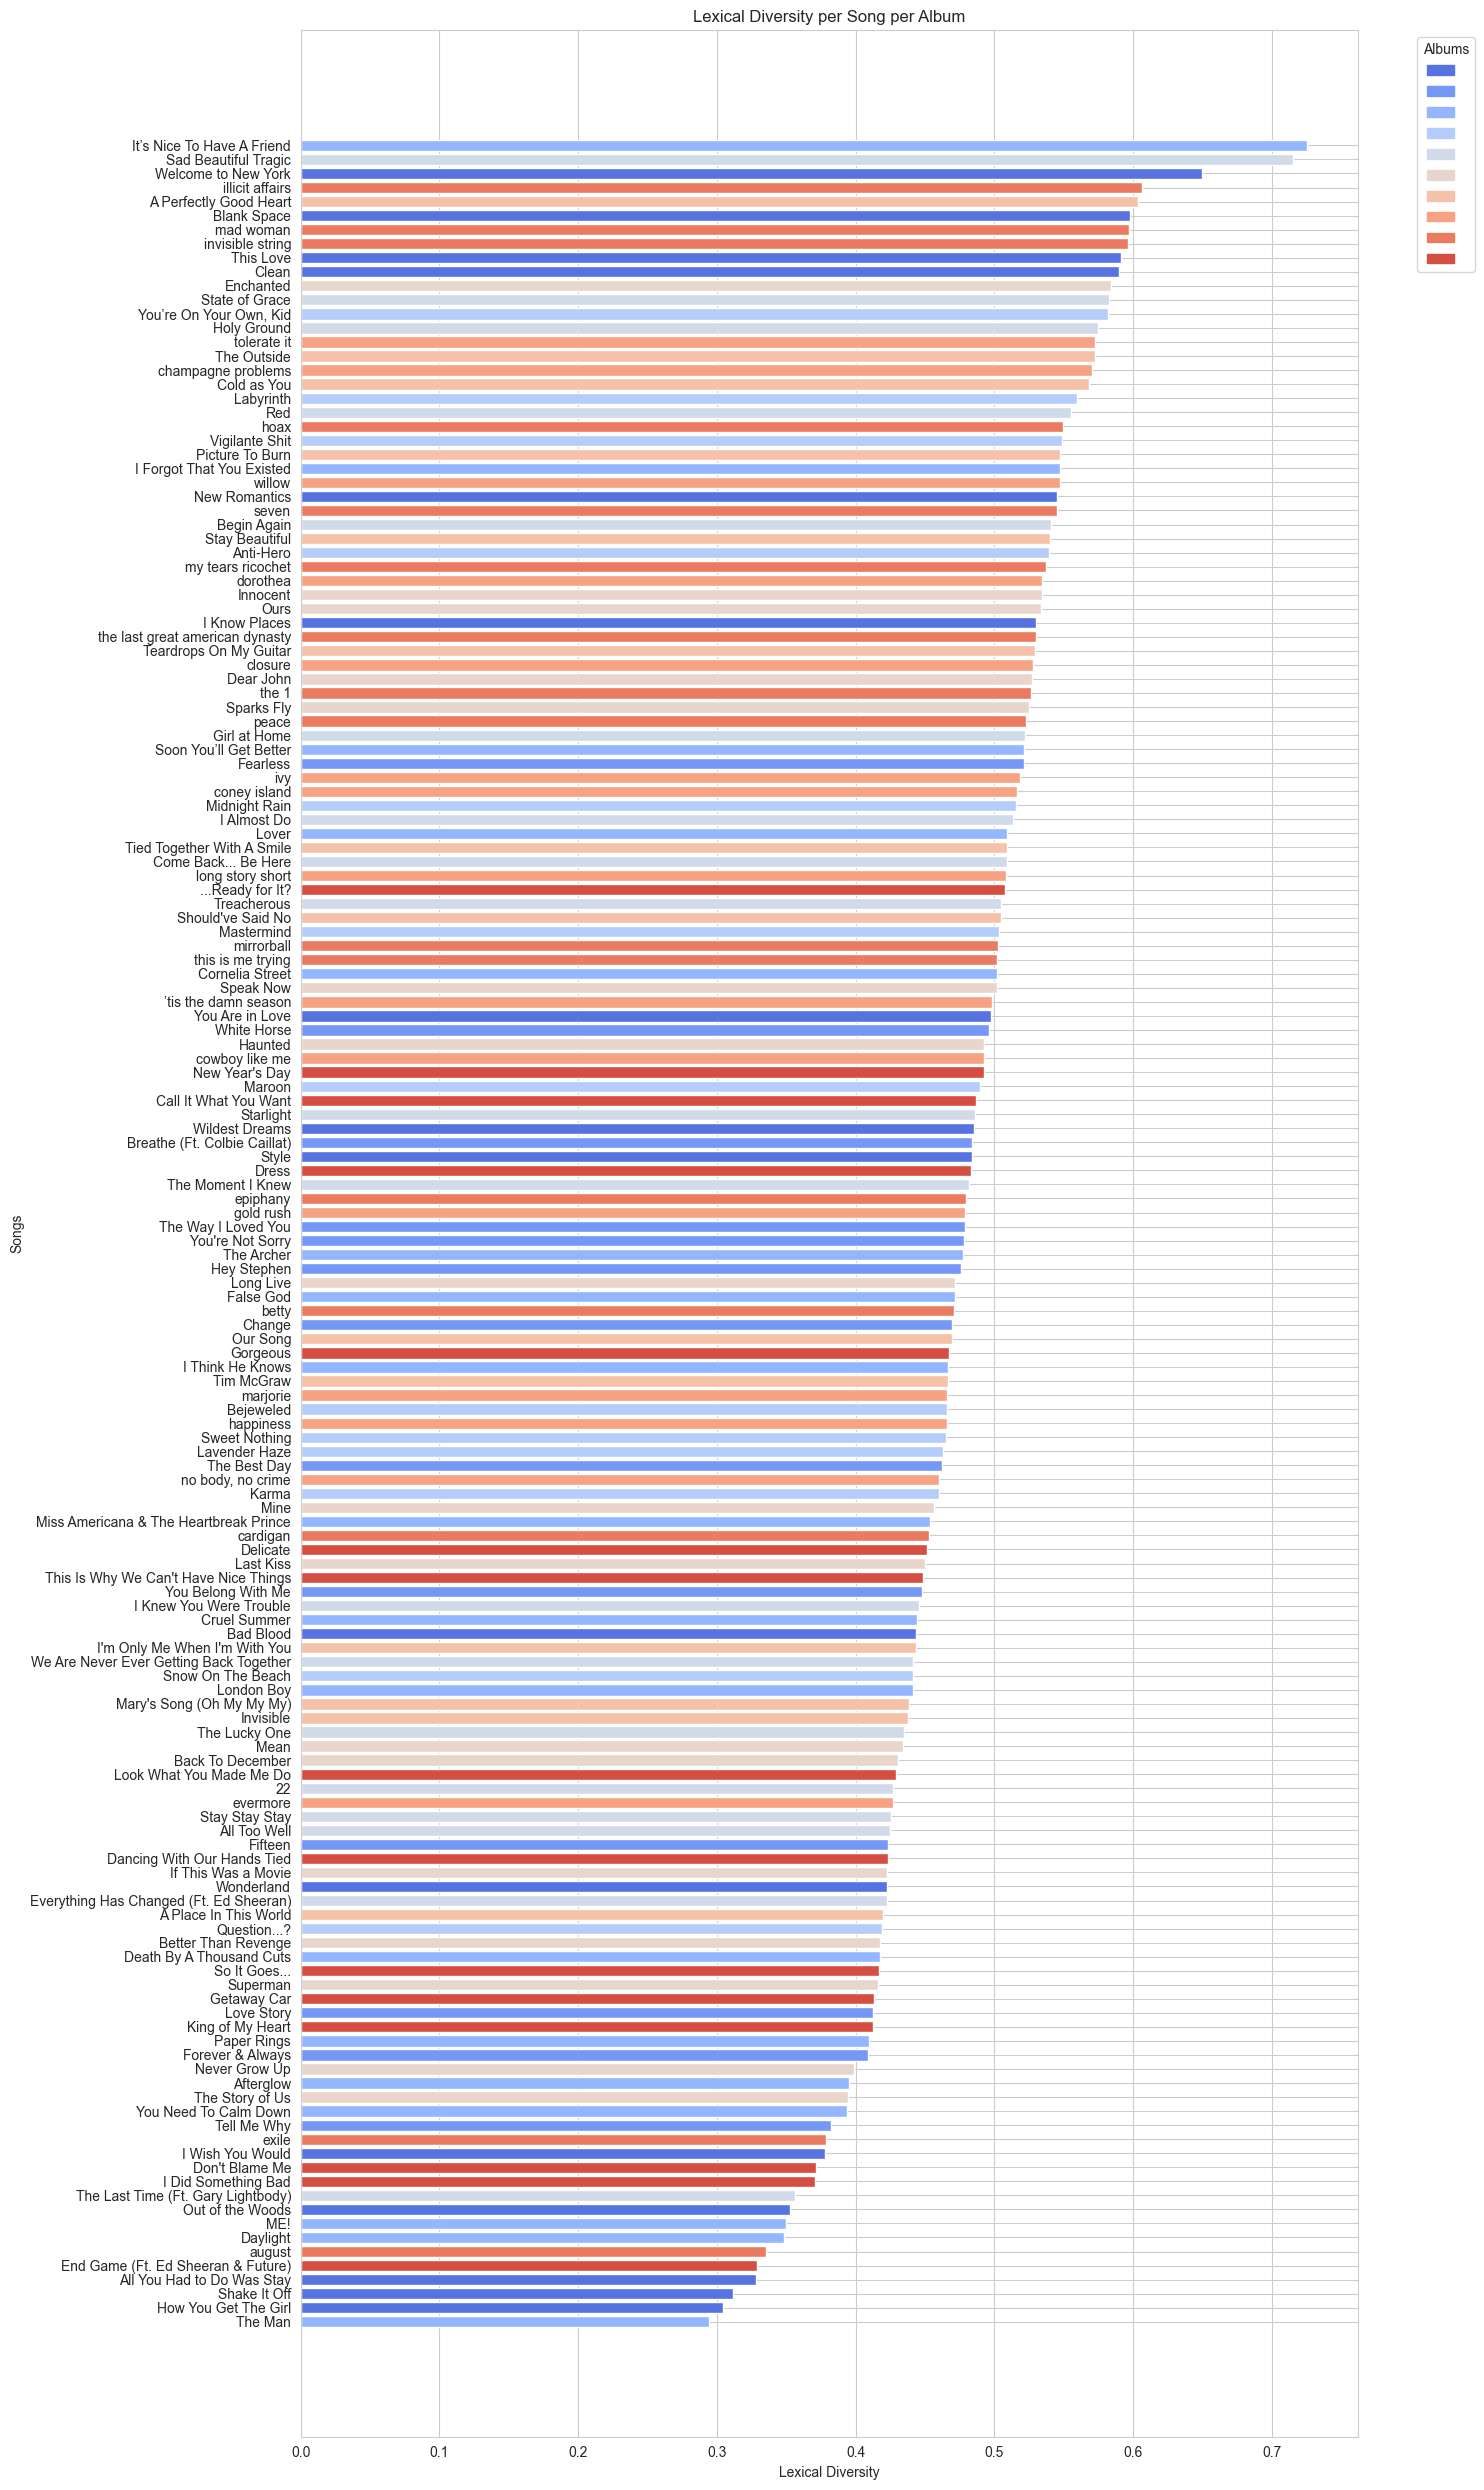

In [53]:

def lexical_diversity(text):
    words = text.split()
    return len(set(words)) / len(words) if words else 0

# Group lyrics by album and track title, and then combine them
grouped_lyrics = df_deduplicated.groupby(['album', 'track_title'])['lyric_clean'].apply(' '.join).reset_index()

# Calculate lexical diversity for each song
grouped_lyrics['lexical_diversity'] = grouped_lyrics['lyric_clean'].apply(lexical_diversity)
album_lexical_diversity = grouped_lyrics.groupby('album')['lexical_diversity'].mean().reset_index()

plt.figure(figsize=(10, 6))
plt.bar(album_lexical_diversity['album'], album_lexical_diversity['lexical_diversity'], color='skyblue')
plt.title('Average Lexical Diversity per Album')
plt.xlabel('Album')
plt.ylabel('Lexical Diversity')
plt.xticks(rotation=45)
plt.show()


palette = sns.color_palette("coolwarm", len(grouped_lyrics['album'].unique()))

# Map each album to a color
album_colors = {album: palette[i] for i, album in enumerate(grouped_lyrics['album'].unique())}

# Add a color column to the sorted DataFrame
sorted_songs = grouped_lyrics.sort_values('lexical_diversity')
sorted_songs['color'] = sorted_songs['album'].map(album_colors)

# Plotting the data with album color coding
plt.figure(figsize=(15, 25))
plt.barh(sorted_songs['track_title'], sorted_songs['lexical_diversity'], color=sorted_songs['color'])
plt.title('Lexical Diversity per Song per Album')
plt.xlabel('Lexical Diversity')
plt.ylabel('Songs')
plt.legend(handles=[plt.Rectangle((0,0),1,1, color=album_colors[album]) for album in album_colors], 
           title='Albums', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [54]:
df_deduplicated[['lyric_clean']].to_parquet("../data/cleaned.parquet", index=False)